In [2]:
# Data management
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.set_style({'font.family':'monospace'})
import matplotlib.ticker as plticker
import matplotlib.dates as md
import itertools

## Article stats

In [3]:
articles_scholar = pd.read_csv('scholar.csv', usecols=[0,1,2,3,4,5,6,7,8]) 
articles_scopus = pd.read_csv('scopus.csv', usecols=[0,1,2,3,4,5,6,7,8]) 
articles = [articles_scholar,articles_scopus]
articles = pd.concat(articles)
articles = articles[articles['Daily discovery']>0.0]
articles.reset_index(inplace=True)
articles.sample(5)

,index,Article,Year,Discovery goal,Discovery method,Discovery bias,Discovery location,Discovery duration,Discovered hidden services,Daily discovery
36,10,46.0,2016,Identification and analysis,Repositories + Tor crawling,Both,External,1.0,481.0,481.000000
11,11,12.0,2016,Analysis,Search engines + Tor crawling,Search engine bias,Both,42.0,113014.0,2690.809524
30,30,31.0,2016,Dataset creation,Onions search engines,Search engine bias,External,60.0,7931.0,132.183333
14,14,15.0,2018,Analysis,Relays injection,Random,Internal,150.0,173190.0,1154.600000
2,2,3.0,2013,Analysis,Relays injection,Random,Internal,1.0,39824.0,39824.000000


In [4]:
articles.Year = pd.to_datetime(articles.Year.astype('int'), format='%Y').dt.year
articles.sample(4)

,index,Article,Year,Discovery goal,Discovery method,Discovery bias,Discovery location,Discovery duration,Discovered hidden services,Daily discovery
8,8,9.0,2013,Analysis,Tor crawling,Seeding bias,Internal,1.0,5715.0,5715.000000
3,3,4.0,2016,Security,Onions search engines,Search engine bias,External,1.0,790.0,790.000000
11,11,12.0,2016,Analysis,Search engines + Tor crawling,Search engine bias,Both,42.0,113014.0,2690.809524
0,0,1.0,2012,Security,Relays injection,Random,Internal,2.0,58389.0,29194.500000


In [5]:
articles.Year = articles.Year.astype('int')

### Experiments per year

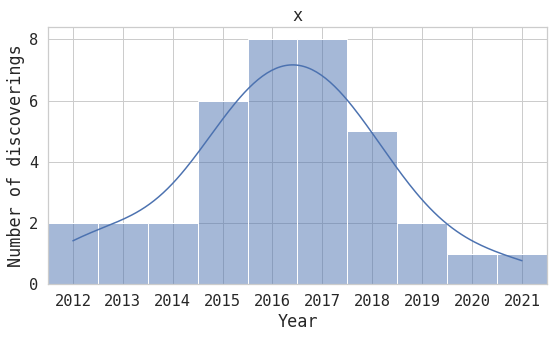

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax = sns.histplot(data=articles, x='Year', ax=ax, discrete=True, kde=True)

ax.set_title('x')
ax.set_ylabel('Number of discoverings')
ax.set_xlabel('Year')

loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(loc)

#ax.set_xlim(articles.Year.min(), articles.Year.max())

ax.margins(x=0)

#plt.gca().xaxis.grid(True)
plt.tight_layout()

### Daily discovery per year

Text(0, 0.5, 'Discovered onion services')

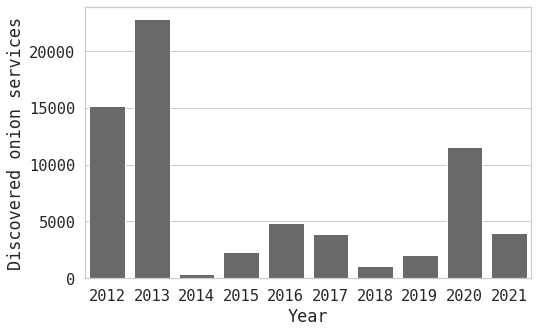

In [7]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax= sns.barplot(data=articles, x="Year", y="Daily discovery", ax=ax, ci=None, color = 'dimgray')

ax.set_ylabel('Discovered onion services')

### Daily discovery per kind of discovery

Text(0, 0.5, 'Discovered onion services')

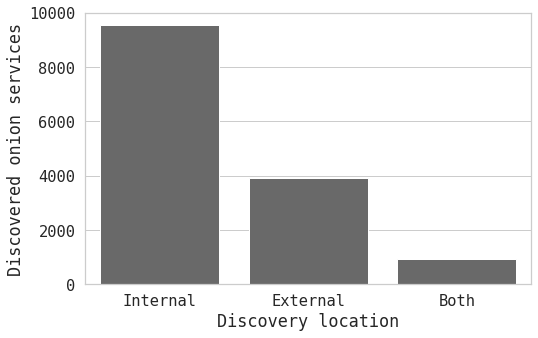

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax= sns.barplot(data=articles, x="Discovery location", y="Daily discovery", ax=ax, ci=None, color = 'dimgray')

ax.set_ylabel('Discovered onion services')

### Common methods

In [9]:
articles["Discovery method"].unique()

array(['Relays injection', 'Onions search engines', 'Repositories',
       'Tor crawling', 'Search engines + Tor crawling',
       'Non-onions seach engines', 'Onions search engines + Repositories',
       'Repositories + Tor crawling', 'Search engines',
       'Onions search engine + Tor crawling',
       'Repositories + Tor crawling + Relay injection',
       'Onions search engines + Tor crawling'], dtype=object)

## Daily discovered hidden services

In [10]:
articles.head()

,index,Article,Year,Discovery goal,Discovery method,Discovery bias,Discovery location,Discovery duration,Discovered hidden services,Daily discovery
0,0,1.0,2012,Security,Relays injection,Random,Internal,2.0,58389.0,29194.50
1,1,2.0,2014,Analysis,Relays injection,Random,Internal,160.0,45000.0,281.25
2,2,3.0,2013,Analysis,Relays injection,Random,Internal,1.0,39824.0,39824.00
3,3,4.0,2016,Security,Onions search engines,Search engine bias,External,1.0,790.0,790.00
4,4,5.0,2015,Security,Onions search engines,Search engine bias,External,1.0,1000.0,1000.00


In [11]:
articles.groupby('Year').agg({'Daily discovery':'mean'})

,Daily discovery
Year,
2012,15182.750000
2013,22769.500000
2014,378.785714
2015,2337.233532
2016,4845.499107
2017,3926.164285
2018,1080.305714
2019,2031.891781
2020,11533.000000


In [12]:
onions = pd.read_csv('hidserv-dir-onions-seen.csv') 
onions['year'] = pd.to_datetime(onions.date, format='%d/%m/%Y').dt.year
onions.sample()

,date,onions,frac,year
1732,15/09/2019,68028.0,0.967049,2019


In [13]:
onions.dropna(inplace=True)
onions.sample(5)

,date,onions,frac,year
1259,30/05/2018,109489.0,0.916877,2018
1471,28/12/2018,108678.0,0.933953,2018
1788,10/11/2019,64233.0,0.985429,2019
2431,14/08/2021,143556.0,0.974783,2021
802,27/02/2017,53819.0,0.701587,2017


In [14]:
display(onions.groupby('year').agg({'onions':'mean'}))

,onions
year,
2014,28296.142857
2015,29235.840000
2016,55523.262295
2017,54791.613699
2018,92405.073973
2019,82129.860274
2020,150729.707650
2021,160543.372263


In [15]:
articles.groupby('Year').agg({'Daily discovery':'mean'})

,Daily discovery
Year,
2012,15182.750000
2013,22769.500000
2014,378.785714
2015,2337.233532
2016,4845.499107
2017,3926.164285
2018,1080.305714
2019,2031.891781
2020,11533.000000


In [16]:
data = pd.concat([onions.groupby('year').agg({'onions':'mean'}),articles.groupby('Year').agg({'Daily discovery':'mean'})],axis=1)

In [17]:
data.dropna(inplace=True)
display(data)

,onions,Daily discovery
2014,28296.142857,378.785714
2015,29235.840000,2337.233532
2016,55523.262295,4845.499107
2017,54791.613699,3926.164285
2018,92405.073973,1080.305714
2019,82129.860274,2031.891781
2020,150729.707650,11533.000000
2021,160543.372263,4000.000000


In [18]:
data.reset_index(inplace=True)

In [19]:
data['index']=data['index'].astype('category')

In [20]:
data['prop'] = data['Daily discovery'] / data['onions']
display(data)

,index,onions,Daily discovery,prop
0,2014,28296.142857,378.785714,0.013386
1,2015,29235.840000,2337.233532,0.079944
2,2016,55523.262295,4845.499107,0.087270
3,2017,54791.613699,3926.164285,0.071656
4,2018,92405.073973,1080.305714,0.011691
5,2019,82129.860274,2031.891781,0.024740
6,2020,150729.707650,11533.000000,0.076514
7,2021,160543.372263,4000.000000,0.024915


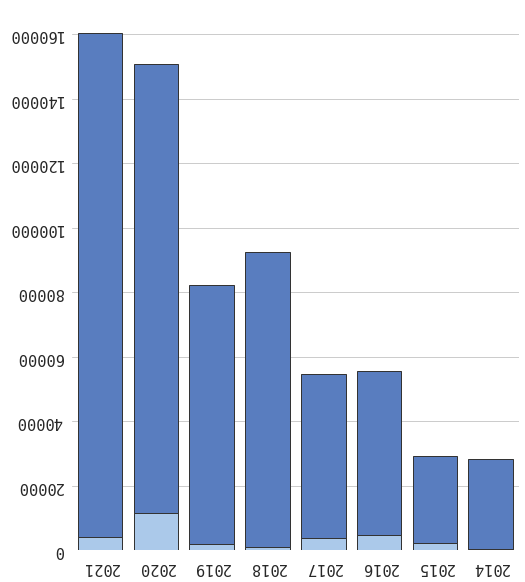

In [21]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,10))


# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(y="onions",
            x='index',
            data=data,
            order=data.sort_values(by='index', ascending=False)['index'],
            label="Estimated .onions",
            color="b",
            linewidth=1,
            edgecolor=".2")

# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(y="Daily discovery",
            x='index',
            order=data.sort_values(by='index', ascending=False)['index'],
            data=data,
            label="Discovered .onions",
            color="b",
            linewidth=1,
            edgecolor=".2")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="upper right", frameon=True, rotation=180)
ax.set_ylabel('')
ax.set_xlabel('')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=180)
plt.setp(ax.yaxis.get_majorticklabels(), rotation=180)

for label in ax.yaxis.get_majorticklabels():
    label.set_verticalalignment('center')

sns.despine(left=True, bottom=True)


#plt.savefig('images/number.svg',transparent=True)

## Total discovered hidden services

In [22]:
articles.head()

,index,Article,Year,Discovery goal,Discovery method,Discovery bias,Discovery location,Discovery duration,Discovered hidden services,Daily discovery
0,0,1.0,2012,Security,Relays injection,Random,Internal,2.0,58389.0,29194.50
1,1,2.0,2014,Analysis,Relays injection,Random,Internal,160.0,45000.0,281.25
2,2,3.0,2013,Analysis,Relays injection,Random,Internal,1.0,39824.0,39824.00
3,3,4.0,2016,Security,Onions search engines,Search engine bias,External,1.0,790.0,790.00
4,4,5.0,2015,Security,Onions search engines,Search engine bias,External,1.0,1000.0,1000.00


In [23]:
display(articles['Discovered hidden services'])

0      58389.0
1      45000.0
2      39824.0
3        790.0
4       1000.0
5       1171.0
6      13243.0
7       6426.0
8       5715.0
9     824324.0
10       352.0
11    113014.0
12      7257.0
13     11533.0
14    173190.0
15    170581.0
16      7831.0
17      1714.0
18      3399.0
19      4000.0
20     13604.0
21      4532.0
22      6227.0
23      2527.0
24      9176.0
25      3536.0
26     13337.0
27      1500.0
28      8000.0
29      3900.0
30      7931.0
31     10163.0
32     46562.0
33      4000.0
34     18261.0
35     28928.0
36       481.0
Name: Discovered hidden services, dtype: float64

In [24]:
onions = pd.read_csv('hidserv-dir-onions-seen.csv') 
onions['year'] = pd.to_datetime(onions.date, format='%d/%m/%Y').dt.year
onions.sample()

,date,onions,frac,year
561,01/07/2016,55446.0,0.568194,2016


In [25]:
onions.dropna(inplace=True)
onions.sample(5)

,date,onions,frac,year
186,22/06/2015,29224.0,0.018224,2015
2286,22/03/2021,178133.0,0.958840,2021
2063,11/08/2020,172382.0,0.976191,2020
1255,26/05/2018,109353.0,0.897044,2018
408,30/01/2016,38331.0,0.429173,2016


In [26]:
display(onions.groupby('year').agg({'onions':'mean'}))

,onions
year,
2014,28296.142857
2015,29235.840000
2016,55523.262295
2017,54791.613699
2018,92405.073973
2019,82129.860274
2020,150729.707650
2021,160543.372263


In [27]:
articles['Discovered hidden services'] = articles['Discovered hidden services'].astype('int')
articles.groupby('Year').agg({'Discovered hidden services':'mean'})

,Discovered hidden services
Year,
2012,29780.00
2013,22769.50
2014,29168.50
2015,32691.50
2016,19610.75
2017,110512.50
2018,40950.40
2019,25281.00
2020,11533.00


In [28]:
data = pd.concat([onions.groupby('year').agg({'onions':'mean'}),articles.groupby('Year').agg({'Discovered hidden services':'mean'})],axis=1)

In [29]:
data.dropna(inplace=True)
display(data)

,onions,Discovered hidden services
2014,28296.142857,29168.50
2015,29235.840000,32691.50
2016,55523.262295,19610.75
2017,54791.613699,110512.50
2018,92405.073973,40950.40
2019,82129.860274,25281.00
2020,150729.707650,11533.00
2021,160543.372263,4000.00


In [30]:
data.reset_index(inplace=True)

In [31]:
data['index']=data['index'].astype('category')

In [32]:
data['prop'] = data['Discovered hidden services'] / data['onions']
display(data)

,index,onions,Discovered hidden services,prop
0,2014,28296.142857,29168.50,1.030830
1,2015,29235.840000,32691.50,1.118199
2,2016,55523.262295,19610.75,0.353199
3,2017,54791.613699,110512.50,2.016960
4,2018,92405.073973,40950.40,0.443162
5,2019,82129.860274,25281.00,0.307817
6,2020,150729.707650,11533.00,0.076514
7,2021,160543.372263,4000.00,0.024915


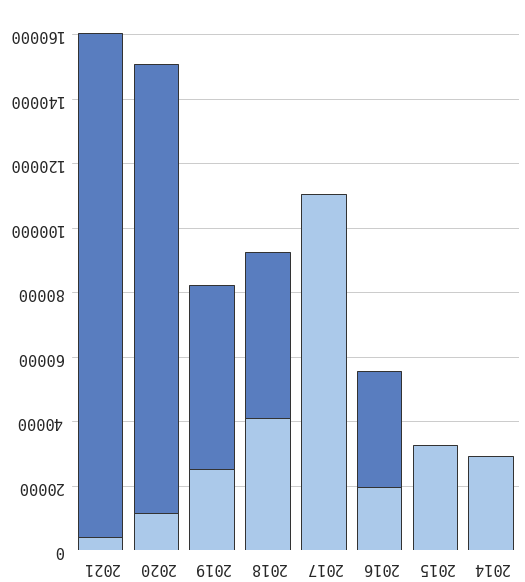

In [33]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,10))


# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(y="onions",
            x='index',
            data=data,
            order=data.sort_values(by='index', ascending=False)['index'],
            label="Estimated .onions",
            color="b",
            linewidth=1,
            edgecolor=".2")

# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(y="Discovered hidden services",
            x='index',
            order=data.sort_values(by='index', ascending=False)['index'],
            data=data,
            label="Discovered .onions",
            color="b",
            linewidth=1,
            edgecolor=".2")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="upper right", frameon=True, rotation=180)
ax.set_ylabel('')
ax.set_xlabel('')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=180)
plt.setp(ax.yaxis.get_majorticklabels(), rotation=180)

for label in ax.yaxis.get_majorticklabels():
    label.set_verticalalignment('center')

sns.despine(left=True, bottom=True)


#plt.savefig('images/number.svg',transparent=True)

# Max daily hidden service

In [34]:
articles.head()

,index,Article,Year,Discovery goal,Discovery method,Discovery bias,Discovery location,Discovery duration,Discovered hidden services,Daily discovery
0,0,1.0,2012,Security,Relays injection,Random,Internal,2.0,58389,29194.50
1,1,2.0,2014,Analysis,Relays injection,Random,Internal,160.0,45000,281.25
2,2,3.0,2013,Analysis,Relays injection,Random,Internal,1.0,39824,39824.00
3,3,4.0,2016,Security,Onions search engines,Search engine bias,External,1.0,790,790.00
4,4,5.0,2015,Security,Onions search engines,Search engine bias,External,1.0,1000,1000.00


In [35]:
articles.groupby('Year').agg({'Daily discovery':'max'})

,Daily discovery
Year,
2012,29194.500000
2013,39824.000000
2014,476.321429
2015,6426.000000
2016,18261.000000
2017,19626.761900
2018,3900.000000
2019,4000.000000
2020,11533.000000


In [36]:
onions = pd.read_csv('hidserv-dir-onions-seen.csv') 
onions['year'] = pd.to_datetime(onions.date, format='%d/%m/%Y').dt.year
onions.sample()

,date,onions,frac,year
557,27/06/2016,58944.0,0.561636,2016


In [37]:
onions.dropna(inplace=True)
onions.sample(5)

,date,onions,frac,year
1357,05/09/2018,102404.0,0.923398,2018
806,03/03/2017,53315.0,0.715797,2017
2299,04/04/2021,166149.0,0.969304,2021
236,11/08/2015,27167.0,0.015820,2015
2360,04/06/2021,163106.0,0.955217,2021


In [38]:
display(onions.groupby('year').agg({'onions':'mean'}))

,onions
year,
2014,28296.142857
2015,29235.840000
2016,55523.262295
2017,54791.613699
2018,92405.073973
2019,82129.860274
2020,150729.707650
2021,160543.372263


In [39]:
articles.groupby('Year').agg({'Daily discovery':'max'})

,Daily discovery
Year,
2012,29194.500000
2013,39824.000000
2014,476.321429
2015,6426.000000
2016,18261.000000
2017,19626.761900
2018,3900.000000
2019,4000.000000
2020,11533.000000


In [40]:
data = pd.concat([onions.groupby('year').agg({'onions':'mean'}),articles.groupby('Year').agg({'Daily discovery':'max'})],axis=1)

In [41]:
data.dropna(inplace=True)
display(data)

,onions,Daily discovery
2014,28296.142857,476.321429
2015,29235.840000,6426.000000
2016,55523.262295,18261.000000
2017,54791.613699,19626.761900
2018,92405.073973,3900.000000
2019,82129.860274,4000.000000
2020,150729.707650,11533.000000
2021,160543.372263,4000.000000


In [42]:
data.reset_index(inplace=True)

In [43]:
data['index']=data['index'].astype('category')

In [44]:
data['prop'] = data['Daily discovery'] / data['onions']
display(data)

,index,onions,Daily discovery,prop
0,2014,28296.142857,476.321429,0.016833
1,2015,29235.840000,6426.000000,0.219799
2,2016,55523.262295,18261.000000,0.328889
3,2017,54791.613699,19626.761900,0.358207
4,2018,92405.073973,3900.000000,0.042205
5,2019,82129.860274,4000.000000,0.048703
6,2020,150729.707650,11533.000000,0.076514
7,2021,160543.372263,4000.000000,0.024915


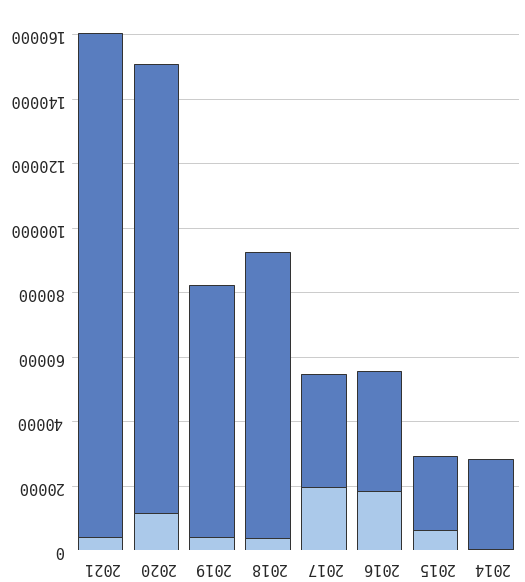

In [45]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,10))


# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(y="onions",
            x='index',
            data=data,
            order=data.sort_values(by='index', ascending=False)['index'],
            label="Estimated .onions",
            color="b",
            linewidth=1,
            edgecolor=".2")

# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(y="Daily discovery",
            x='index',
            order=data.sort_values(by='index', ascending=False)['index'],
            data=data,
            label="Discovered .onions",
            color="b",
            linewidth=1,
            edgecolor=".2")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="upper right", frameon=True, rotation=180)
ax.set_ylabel('')
ax.set_xlabel('')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=180)
plt.setp(ax.yaxis.get_majorticklabels(), rotation=180)

for label in ax.yaxis.get_majorticklabels():
    label.set_verticalalignment('center')

sns.despine(left=True, bottom=True)


#plt.savefig('images/number.svg',transparent=True)